In [ ]:
Nguyễn Thái Bình - 19146050 - Nhóm 02CLC - 4 loai banh

In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [30]:
trainset='/content/drive/MyDrive/data_banh'

data_generator = ImageDataGenerator(rescale=1/255.0,validation_split=0.1)

In [31]:
train_dataset=data_generator.flow_from_directory(trainset,target_size=(150,150),batch_size=10,class_mode='categorical',subset="training",shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,target_size=(150,150),batch_size=10,class_mode='categorical',subset="validation",shuffle=True)

Found 73 images belonging to 4 classes.
Found 7 images belonging to 4 classes.


In [32]:
print(train_dataset.class_indices)
print(validation_set.class_indices)

{'banh_da_lon': 0, 'banh_hoi': 1, 'banh_uot': 2, 'banh_xeo': 3}
{'banh_da_lon': 0, 'banh_hoi': 1, 'banh_uot': 2, 'banh_xeo': 3}


In [33]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

In [34]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [35]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(train_dataset,batch_size=5,epochs=10,verbose=1,validation_data=validation_set)

Epoch 1/10
8/8 [==============================] - 5s 507ms/step - loss: 4.8378 - accuracy: 0.2055 - val_loss: 1.3656 - val_accuracy: 0.1429
Epoch 2/10
8/8 [==============================] - 4s 484ms/step - loss: 1.3461 - accuracy: 0.3973 - val_loss: 1.2611 - val_accuracy: 0.2857
Epoch 3/10
8/8 [==============================] - 5s 601ms/step - loss: 1.2174 - accuracy: 0.4521 - val_loss: 1.0524 - val_accuracy: 0.5714
Epoch 4/10
8/8 [==============================] - 7s 787ms/step - loss: 1.0480 - accuracy: 0.5890 - val_loss: 0.9895 - val_accuracy: 0.5714
Epoch 5/10
8/8 [==============================] - 5s 539ms/step - loss: 0.6748 - accuracy: 0.6986 - val_loss: 0.6284 - val_accuracy: 0.8571
Epoch 6/10
8/8 [==============================] - 5s 654ms/step - loss: 0.4585 - accuracy: 0.7945 - val_loss: 1.0960 - val_accuracy: 0.4286
Epoch 7/10
8/8 [==============================] - 5s 598ms/step - loss: 0.4053 - accuracy: 0.8493 - val_loss: 0.7226 - val_accuracy: 0.5714
Epoch 8/10
8/8 [====

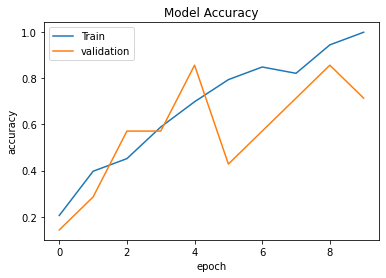

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [37]:
model.save('/content/drive/MyDrive/BT AI/pl_banh.h5')

In [38]:
load_model('/content/drive/MyDrive/BT AI/pl_banh.h5')

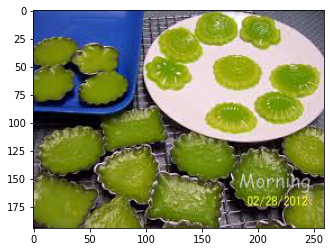

In [48]:
url='/content/drive/MyDrive/test_banh/banh_da_lon.jpeg'
plt.imshow(load_img(url))

In [49]:
#{'banh_da_lon': 0, 'banh_hoi': 1, 'banh_uot': 2, 'banh_xeo': 3}
img=load_img('/content/drive/MyDrive/test_banh/banh_da_lon.jpeg',target_size=(150,150))
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([0])

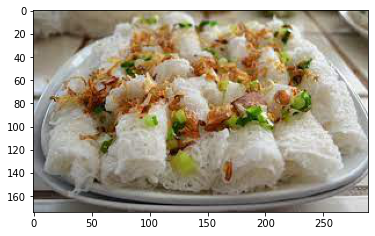

In [61]:
url='/content/drive/MyDrive/test_banh/banh_hoi.jpeg'
plt.imshow(load_img(url))

In [62]:
img=load_img('/content/drive/MyDrive/test_banh/banh_hoi.jpeg',target_size=(150,150))
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([1])

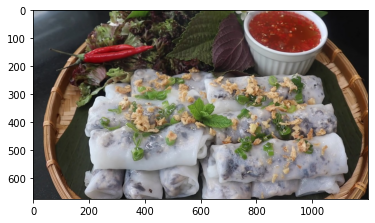

In [65]:
url='/content/drive/MyDrive/test_banh/banh_uot.jpg'
plt.imshow(load_img(url))

In [66]:
img=load_img('/content/drive/MyDrive/test_banh/banh_uot.jpg',target_size=(150,150))
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([2])

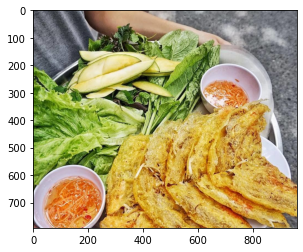

In [54]:
url='/content/drive/MyDrive/test_banh/banh_xeo.jpg'
plt.imshow(load_img(url))

In [55]:
img=load_img('/content/drive/MyDrive/test_banh/banh_xeo.jpg',target_size=(150,150))
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([3])